### Часть 1. Описание библиотеки и API

#### Что такое GeoPandas?

**GeoPandas** — это открытый проект Python, созданный для упрощения работы с геопространственными данными. По своей сути, это расширение всем известной библиотеки pandas, которое добавляет встроенную поддержку географических и пространственных данных через объекты Shapely.

Основная идея проста: в классической работе с табличными данными в Python используется pandas DataFrame, но когда в этих данных появляется географический компонент (например, координаты, полигоны или линии), требуется либо дорогостоящее специализированное ПО (ArcGIS), либо серверные ГИС системы (PostGIS). GeoPandas устраняет эту проблему, предоставляя единый Python-интерфейс для пространственного анализа, который работает с файловыми системами и не требует отдельного сервера.

**Основные задачи, которые решает GeoPandas:**

- Чтение и запись геопространственных данных множества форматов (Shapefile, GeoJSON, GeoPackage, KML)
- Выполнение пространственных анализов и операций без дополнительного ПО
- Трансформация и репроецирование координат между различными системами
- Соединение датасетов на основе пространственных отношений (spatial joins)
- Визуализация карт и географических данных
- Агрегирование пространственных данных по атрибутам


#### Основные структуры данных

GeoPandas реализует две ключевые структуры данных, которые являются подклассами pandas:

**GeoSeries** — это расширенная версия `pandas.Series`, специализированная для хранения геометрических объектов Shapely. Каждый элемент GeoSeries может быть точкой (Point), линией (LineString), полигоном (Polygon) или их мультивариантами (MultiPoint, MultiLineString, MultiPolygon). Критическим атрибутом является `crs` (расшифровывается как Coordinate Reference System), который определяет, как интерпретировать координаты относительно поверхности Земли.

**GeoDataFrame** — это расширенная версия `pandas.DataFrame`, которая объединяет обычные табличные данные с геометрией. В отличие от типичных ГИС-систем, где поддерживается только одна колонка геометрии, GeoDataFrame может содержать несколько геометрических колонок, но только одна из них считается "активной" геометрией. Доступ к активной геометрии осуществляется через атрибут `.geometry`, а её имя хранится в `._geometry_column_name`.

**GeometryArray** — это внутренняя структура данных, используемая для эффективного хранения массивов геометрий. Начиная с версии 0.12, GeoPandas использует массивы, основанные на Shapely 2.0, вместо ранее использовавшейся библиотеки PyGEOS. На уровне GeometryArray хранится информация о CRS, что обеспечивает сохранение проекции для каждой геометрической колонки.

#### Полный API: методы и атрибуты

**Атрибуты GeoSeries:**

- `area` — площадь каждой геометрии (в единицах проекции)
- `bounds` — кортеж (minx, miny, maxx, maxy) для каждой геометрии
- `length` — длина линейных геометрий
- `geom_type` — тип каждой геометрии (Point, Polygon, etc)
- `is_valid` — проверка валидности геометрии согласно стандартам OGC
- `centroid` — центроид полигона
- `convex_hull` — выпуклая оболочка вокруг геометрии
- `envelope` — минимальный прямоугольник, содержащий геометрию

**Методы расстояния и близости:**

- `distance(other)` — минимальное расстояние от каждой геометрии до другой
- `buffer(distance)` — создание буферной зоны на заданном расстоянии
- `simplify(tolerance)` — упрощение геометрии путём удаления излишних вершин

**Методы проверки пространственных отношений:**

- `intersects(other)` — проверка, пересекаются ли геометрии
- `within(other)` — находится ли каждая геометрия внутри другой
- `contains(other)` — содержит ли каждая геометрия другую
- `equals(other)` — эквивалентны ли геометрии с заданной точностью
- `touches(other)` — проверка, касаются ли геометрии (но не пересекаются)

**Методы теоретико-множественных операций:**

- `union(other)` — объединение двух геометрий
- `intersection(other)` — пересечение двух геометрий
- `difference(other)` — разница между геометриями
- `symmetric_difference(other)` — симметричная разница

**Методы преобразования координат:**

- `to_crs(crs)` — трансформация к новой системе координат
- `set_crs(crs)` — установка CRS без трансформации

**Методы трансформации геометрии:**

- `rotate(angle)` — поворот вокруг начала координат
- `scale(xfact, yfact)` — масштабирование
- `translate(xoff, yoff)` — сдвиг
- `affine_transform(matrix)` — применение аффинного преобразования

**Методы GeoDataFrame (дополнительно к DataFrame):**

- `sjoin(other, how, predicate)` — spatial join (то есть объединение по пространственным отношениям)
- `overlay(other, how)` — комбинирование двух датасетов с различными логиками
- `dissolve(by, aggfunc)` — агрегирование и объединение геометрий по атрибутам
- `explode()` — преобразование мультигеометрий в отдельные строки
- `plot()` — визуализация на карте с использованием matplotlib
- `explore()` — создание интерактивной карты


#### Пример структуры взаимодействия с API

```python
import geopandas as gpd
from shapely.geometry import Point

#создание GeoDataFrame
gdf = gpd.GeoDataFrame(
    {'city': ['Paris', 'London'], 'population': [2161000, 8982000]},
    geometry=[Point(2.3522, 48.8566), Point(-0.1278, 51.5074)],
    crs="EPSG:4326"
)

#доступ к геометрии
print(gdf.geometry)

#вычисление расстояния между первой и остальными точками
first_point = gdf.geometry.iloc[^0]
gdf['distance_to_paris'] = gdf.geometry.distance(first_point)

#создание буферной зоны (50 км, требует проектированной системы координат)
gdf_projected = gdf.to_crs("EPSG:3857")
gdf_projected['buffer_50km'] = gdf_projected.geometry.buffer(50000)

#пространственное объединение
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities_with_country = gpd.sjoin(cities, countries, how="inner", predicate='within')

#агрегирование по странам (то есть объединение полигонов)
countries_dissolved = countries.dissolve(by='continent', aggfunc='sum')
```

### Часть 2. Техническая реализация библиотеки

#### Архитектура проекта

GeoPandas организована в модульной структуре, где каждый модуль отвечает за определённую функциональность:

**Основные модули:**

- **`geopandas/geodataframe.py`** — реализация класса GeoDataFrame, основного класса библиотеки
- **`geopandas/geoseries.py`** — реализация класса GeoSeries
- **`geopandas/tools/overlay.py`** — функции для пространственного объединения датасетов (union, intersection, difference)
- **`geopandas/tools/sjoin.py`** — реализация spatial join с различными предикатами
- **`geopandas/io/file.py`** — функции read_file() и write_file() для работы с файлами
- **`geopandas/plotting/`** — интеграция с matplotlib для визуализации
- **`geopandas/array.py`** — GeometryArray для работы с массивами геометрий


#### Ключевые паттерны проектирования

**1. Паттерн наследования и переопределение методов**

GeoDataFrame и GeoSeries наследуют от `pandas.DataFrame` и `pandas.Series` соответственно. Это позволяет использовать все методы pandas (фильтрация, группировка, агрегирование) вместе с географическими операциями:

```python
class GeoDataFrame(DataFrame):
    _metadata = ["_geometry_column_name"]
    _internal_names = DataFrame._internal_names + ["geometry"]
    _internal_names_set = set(_internal_names)
    _geometry_column_name = None
    
    def __init__(self, data=None, *args, geometry=None, crs=None, **kwargs):
        #инициализация родительского dataframe
        super().__init__(data, *args, **kwargs)
        #установка геометрии и crs
```

Метаданные (`_metadata`) важны для сохранения информации о geometry-колонке при операциях с DataFrame (например, при копировании).

**2. Паттерн аксессор (Accessor Pattern)**

GeoPandas использует паттерн аксессоров, похожий на `pandas.DataFrame.str` для строк. Все методы GeoSeries доступны напрямую, что выглядит естественно:

```python
#вместо shapely.buffer(gdf.geometry, 100)
#используем
gdf.geometry.buffer(100)
```

**3. Векторизация операций**

Все операции применяются элементно ко всем геометриям в GeoSeries:

```python
#применяется к каждой геометрии
gdf.geometry.distance(other_geometry)

#бинарные операции с выравниванием по индексу
gdf1.geometry.buffer(100) + gdf2.geometry
```

Это достигается благодаря использованию shapely's vectorized операций на уровне GeometryArray.

**4. Управление системой координат (CRS)**

CRS управляется на уровне GeometryArray, что позволяет разным геометрическим колонкам в одном GeoDataFrame иметь разные проекции:

```python
class GeoDataFrame(DataFrame):
    def to_crs(self, crs):
        """Трансформация к новой crs"""
        return self.copy(deep=True)._to_crs(crs)
    
    def set_geometry(self, col, drop=True, inplace=False, crs=None):
        """Установка активной geometry-колонки"""
        #проверка CRS совместимости
        if crs is not None and geometry.crs != crs:
            raise ValueError("CRS mismatch")
```

**5. Интеграция с Shapely через GeometryArray**

GeoPandas хранит geometries в `GeometryArray`, которая обёртывает Shapely objects. Это позволяет эффективно работать с большими датасетами:

```python
#на уровне GeometryArray
geometry_array = gdf.geometry.array

#shapely операции применяются на всём массиве
import shapely
mrr = shapely.minimum_rotated_rectangle(gdf.geometry.array)
```

**6. Двухуровневая система ввода-вывода**

GeoPandas использует два backend'а для чтения файлов — **pyogrio** (по умолчанию, быстрее) и **fiona** (более универсальный):

```python
def read_file(path_or_buffer, ..., engine="pyogrio"):
    if engine == "pyogrio":
        return pyogrio.read_dataframe(path_or_buffer, ...)
    elif engine == "fiona":
        return fiona.read_dataframe(path_or_buffer, ...)
```

**pyogrio** обеспечивает более быструю работу с большими файлами:

```python
#pyogrio.geopandas
def read_dataframe(path_or_buffer, ...):
    #используется OGR для чтения
    geometry = shapely.from_wkb(geometry, on_invalid=on_invalid)
    return gp.GeoDataFrame(df, geometry=geometry, crs=meta["crs"])
```


#### Реализация пространственных операций

**1. Spatial Join (sjoin)**

Spatial join объединяет два GeoDataFrame'а на основе пространственных отношений:

```python
def sjoin(left_gdf, right_gdf, how="inner", predicate="intersects"):
    """
    how: 'inner', 'left', 'right'
    predicate: 'intersects', 'within', 'contains', 'crosses', 'touches'
    """
    #внутренняя реализация использует вот это:
    #1. построение spatial indices для быстрого поиска кандидатов
    #2. проверку predicate для каждой пары
    #3. объединение результатов как pandas merge
```

**2. Overlay операции**

Overlay объединяет два датасета, создавая новые геометрии на пересечениях:

```python
def overlay(df1, df2, how='intersection'):
    """
    как: 'intersection', 'union', 'difference', 'symmetric_difference'
    
    Реализация:
    - intersection: dfinter = _overlay_intersection(df1, df2)
    - union: объединение intersection и symmetric_difference
    - difference: df1 минус df2
    """
    if how == 'union':
        dfinter = _overlay_intersection(df1, df2)
        dfsym = _overlay_symmetric_diff(df1, df2)
        dfunion = pd.concat([dfinter, dfsym], ignore_index=True)
        return dfunion
```

**3. Dissolve (агрегирование)**

Dissolve объединяет геометрии по атрибутам:

```python
def dissolve(gdf, by=None, aggfunc='first'):
    """
    Агрегирует строки, объединяя их геометрии через unary_union
    """
    #группировка по атрибутам
    grouped = gdf.groupby(by)
    
    #объединение геометрий в каждой группе
    aggregated_geometry = grouped.geometry.apply(
        lambda geoms: unary_union(geoms)
    )
    
    #агрегирование других колонок
    other_cols = grouped[other_columns].agg(aggfunc)
```

Для распределённой обработки (dask-geopandas) используется параллелизация через `split_out` parameter:

```python
def dissolve(ddf, by=None, split_out=1):
    """
    split_out > 1 позволяет распределить unary_union
    операции между workers
    """
```


#### Интеграция с Shapely 2.0

Начиная с GeoPandas 0.12, библиотека полностью перешла на Shapely 2.0. Это означает:

- Использование **vectorized shapely операций** вместо PyGEOS
- Все операции работают на уровне GeometryArray
- Лучшая производительность для больших датасетов:

```python
#вместо PyGEOS (старый способ):
import pygeos
geometries = gdf.geometry.values.data
mrr = pygeos.minimum_rotated_rectangle(geometries)

#по-новому (shapely 2.0):
import shapely
mrr = shapely.minimum_rotated_rectangle(gdf.geometry.array)
```


#### Визуализация с matplotlib

GeoPandas предоставляет тонкий слой над matplotlib для удобства:

```python
def plot(self, column=None, cmap=None, color=None, **kwargs):
    """
    Создаёт matplotlib figure с геометриями
    """
    #использует matplotlib.patches для отрисовки
    #возвращает matplotlib.axes.Axes для дальнейшей кастомизации
    ax = self._plot_colormap(...)
    return ax
```

Интерактивное исследование через `explore()` использует folium/leaflet:

```python
def explore(self, column=None, cmap=None, **kwargs):
    """
    Создаёт интерактивную карту на основе folium
    """
    return folium_map
```


#### Расширяемость и экосистема

GeoPandas интегрируется с множеством инструментов:

- **dask-geopandas** — распределённая обработка больших датасетов
- **shapely** — все геометрические операции
- **pyproj** — трансформация координат
- **pyogrio/fiona** — чтение файлов разных форматов
- **matplotlib** — визуализация
- **folium** — интерактивные карты


### Часть 3. Примеры использования библиотеки в прикладных задачах

#### Пример 1. Найти все страны, находящиеся в радиусе 500 км от Вены




,country,distance_km
114,Austria,0.000000
152,Slovakia,42.437607
115,Hungary,46.014869
153,Czechia,59.662303
150,Slovenia,151.303152
126,Croatia,189.969946
121,Germany,218.069054
113,Poland,224.797047
141,Italy,270.983642
172,Serbia,315.892527


,city,distance_km
212,Vienna,0.970343
20,Bratislava,55.622773
146,Budapest,217.029235
160,Prague,252.637370
95,Zagreb,269.208110
19,Ljubljana,278.016589
112,Belgrade,489.088815


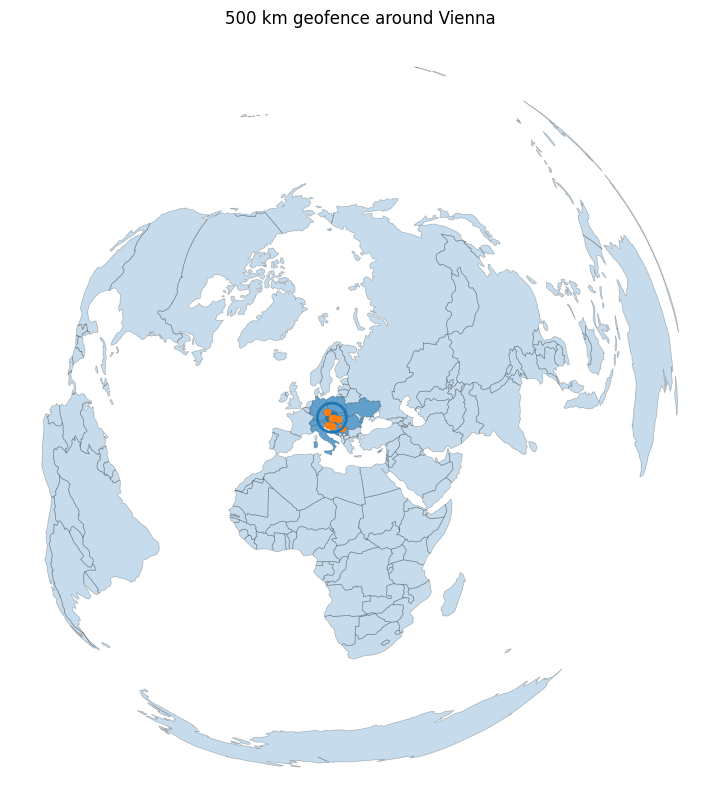

In [13]:
#Установка
%pip -q install geopandas shapely pyproj matplotlib

import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import os
import zipfile
import urllib.request

#Скачиваем данные Natural Earth, потому что gpd.datasets удалён в GeoPandas 1.0+
countries_zip = "ne_110m_admin_0_countries.zip"
cities_zip    = "ne_110m_populated_places.zip"

countries_url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
cities_url    = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_populated_places.zip"

def download_if_missing(url, path):
    if not os.path.exists(path):
        urllib.request.urlretrieve(url, path)

download_if_missing(countries_url, countries_zip)
download_if_missing(cities_url, cities_zip)

#Распаковываем архивы
def unzip_if_needed(zip_path):
    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall(".")

unzip_if_needed(countries_zip)
unzip_if_needed(cities_zip)

#Читаем shapefile в GeoDataFrame
world = gpd.read_file("ne_110m_admin_0_countries.shp")       # полигоны стран
cities = gpd.read_file("ne_110m_populated_places.shp")      # точки городов/поселений

#Создаём точку Вены (lon, lat) в EPSG:4326 (широта/долгота)
vienna = gpd.GeoDataFrame(
    {"name": ["Vienna"]},
    geometry=[Point(16.3738, 48.2082)],
    crs="EPSG:4326"
)

#Переводим всё в метрическую проекцию чтобы расстояния были в метрах
#EPSG:3035 (LAEA Europe) - хорошая общеевропейская проекция в метрах
world_eu  = world.to_crs("EPSG:3035")
cities_eu = cities.to_crs("EPSG:3035")
vienna_eu = vienna.to_crs("EPSG:3035")

#Строим буфер 500 км вокруг Вены
radius_m = 500_000
buffer_500km = vienna_eu.buffer(radius_m).iloc[0]
vienna_geom = vienna_eu.geometry.iloc[0]

#Находим страны, которые пересекаются с буфером
near_countries = world_eu[world_eu.intersects(buffer_500km)].copy()

#Считаем расстояние от Вены до страны в км
near_countries["distance_km"] = near_countries.geometry.distance(vienna_geom) / 1000

#Находим города внутри буфера и считаем расстояния
cities_in_radius = cities_eu[cities_eu.within(buffer_500km)].copy()
cities_in_radius["distance_km"] = cities_in_radius.geometry.distance(vienna_geom) / 1000

#Выводим таблицы : топ15 стран по расстоянию + топ 15 ближайших городов
#В Natural Earth названия часто лежат в поле NAME / NAME_EN (в зависимости от слоя)
country_name_col = "NAME" if "NAME" in near_countries.columns else near_countries.columns[0]
city_name_col = "NAME" if "NAME" in cities_in_radius.columns else cities_in_radius.columns[0]

display(
    near_countries[[country_name_col, "distance_km"]]
    .sort_values("distance_km")
    .head(15)
    .rename(columns={country_name_col: "country"})
)

display(
    cities_in_radius[[city_name_col, "distance_km"]]
    .sort_values("distance_km")
    .head(15)
    .rename(columns={city_name_col: "city"})
)

#Рисуем карту: фон (страны), подсветка стран в зоне, граница буфера, Вена, ближайшие города
fig, ax = plt.subplots(figsize=(10, 10))

world_eu.plot(ax=ax, linewidth=0.5, edgecolor="black", alpha=0.25) #фон
near_countries.plot(ax=ax, alpha=0.6) #страны в зоне
gpd.GeoSeries([buffer_500km], crs=world_eu.crs).boundary.plot(ax=ax, linewidth=2) #окружность 500 км
vienna_eu.plot(ax=ax, markersize=80) #точка Вены
cities_in_radius.sort_values("distance_km").head(30).plot(ax=ax, markersize=20) #30 ближайших городов

ax.set_title("500 km geofence around Vienna")
ax.set_axis_off()
plt.show()

### Пример 2. Привязка городов к странам и агрегация показателей

,country,CONTINENT,city_count,pop_sum,pop_max_city
4,United States of America,North America,9,65181000.0,19040000.0
139,China,Asia,5,40997000.0,14987000.0
43,France,Europe,4,11234369.0,9904000.0
98,India,Asia,4,40869797.0,18978000.0
25,South Africa,Africa,4,8451064.0,3435000.0
141,Italy,Europe,3,3369411.0,3339000.0
162,Morocco,Africa,3,5074084.0,3181000.0
3,Canada,North America,3,8671328.0,5213000.0
29,Brazil,South America,3,34309996.0,18845000.0
155,Japan,Asia,3,48775000.0,35676000.0


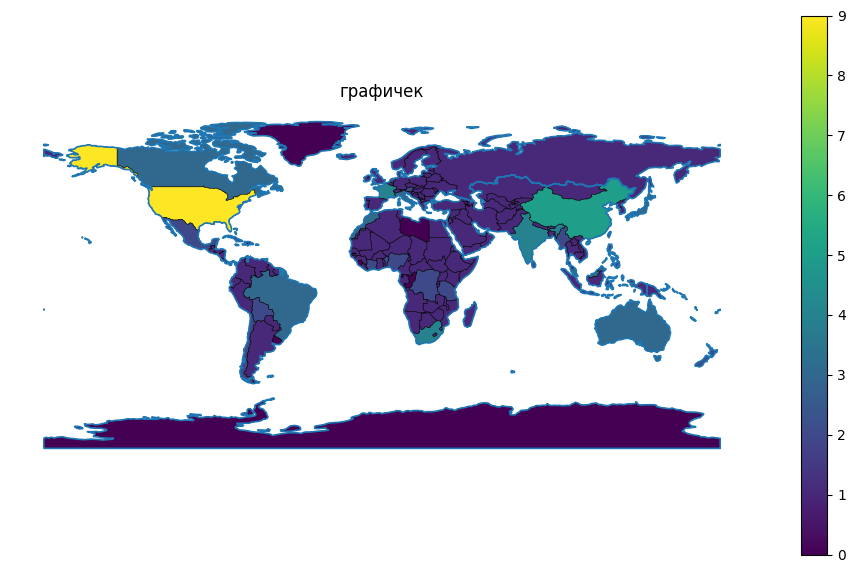

In [14]:
#Читаем те же Natural Earth слои
world  = gpd.read_file("ne_110m_admin_0_countries.shp")
cities = gpd.read_file("ne_110m_populated_places.shp")

#Приводим crs к единому
if world.crs is None:
    world = world.set_crs("EPSG:4326")
if cities.crs is None:
    cities = cities.set_crs("EPSG:4326")
cities = cities.to_crs(world.crs)

world_small = (
    world[["NAME", "CONTINENT", "geometry"]]
    .rename(columns={"NAME": "country"})
    .copy()
)

#Выбираем столбец населения города
pop_candidates = ["POP_MAX", "POP_MIN", "POP_OTHER"]
pop_col = next((c for c in pop_candidates if c in cities.columns), None)

#Spatial join: каждому городу сопоставляем страну/континент, внутри которых он находится
cities_in_countries = gpd.sjoin(
    cities,
    world_small,
    how="inner",
    predicate="within"
)

#Агрегация по странам: сколько населённых пунктов + суммарная численность
agg_dict = {"city_count": ("geometry", "size")}
if pop_col is not None:
    cities_in_countries[pop_col] = pd.to_numeric(cities_in_countries[pop_col], errors="coerce")
    agg_dict["pop_sum"] = (pop_col, "sum")
    agg_dict["pop_max_city"] = (pop_col, "max")

country_stats = (
    cities_in_countries
    .groupby(["country", "CONTINENT"], as_index=False)
    .agg(**agg_dict)
)

#Присоединяем статистику обратно к полигонам стран
world_stats = world_small.merge(country_stats, on=["country", "CONTINENT"], how="left")
world_stats["city_count"] = world_stats["city_count"].fillna(0).astype(int)
if "pop_sum" in world_stats.columns:
    world_stats["pop_sum"] = world_stats["pop_sum"].fillna(0)

#Таблица: получилм топ 15 стран по числу населённых пунктов из слоя natural Earth
cols = ["country", "CONTINENT", "city_count"]
if "pop_sum" in world_stats.columns:
    cols += ["pop_sum", "pop_max_city"]

display(
    world_stats[cols]
    .sort_values("city_count", ascending=False)
    .head(15)
)

#Карта: хороплет по количеству населённых пунктов и  границы континентов
continents = world_stats.dissolve(by="CONTINENT")

fig, ax = plt.subplots(figsize=(12, 7))

world_stats.plot(
    ax=ax,
    column="city_count",
    legend=True,
    linewidth=0.4,
    edgecolor="black"
)

continents.boundary.plot(ax=ax, linewidth=1.2)

ax.set_title("графичек")
ax.set_axis_off()
plt.show()

### Пример 3. Поиск ближайшего города к центроиду стран

,country,city,distance_km,pop_max
0,Russia,Moscow,3041.782655,10452000
1,Norway,Oslo,751.642835,835000
2,Finland,Helsinki,459.840353,1115000
3,France,Madrid,440.058771,5567000
4,Sweden,Stockholm,360.466924,1264000
5,Germany,Berlin,269.106310,3406000
6,United Kingdom,Dublin,237.228463,1059000
7,Iceland,Reykjavík,185.706218,166212
8,Romania,Bucharest,181.056643,1942000
9,Austria,Ljubljana,177.398599,314807


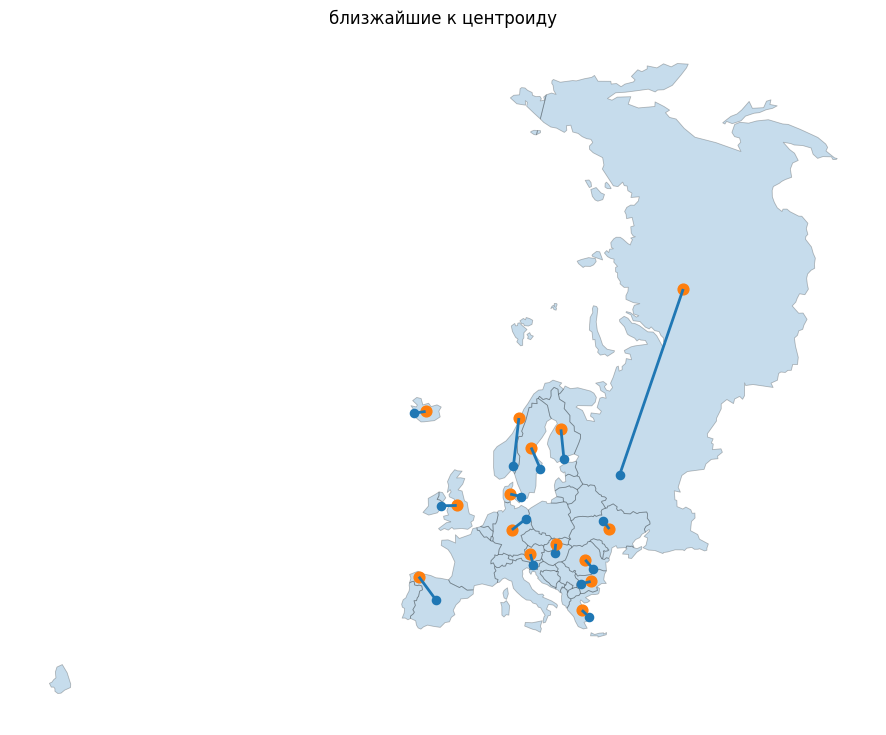

In [15]:
from shapely.geometry import LineString

world  = gpd.read_file("ne_110m_admin_0_countries.shp")
cities = gpd.read_file("ne_110m_populated_places.shp")

if world.crs is None:
    world = world.set_crs("EPSG:4326")
if cities.crs is None:
    cities = cities.set_crs("EPSG:4326")

europe = world[world["CONTINENT"] == "Europe"][["NAME", "geometry"]].rename(columns={"NAME": "country"}).copy()

europe_eu = europe.to_crs("EPSG:3035")
cities_eu = cities.to_crs("EPSG:3035")

#Города внутри Европы
cities_in_europe = gpd.sjoin(
    cities_eu,
    europe_eu[["country", "geometry"]],
    how="inner",
    predicate="within"
).drop(columns=["index_right"])

city_name_col = "NAME" if "NAME" in cities_in_europe.columns else (
    "NAMEASCII" if "NAMEASCII" in cities_in_europe.columns else cities_in_europe.columns[0]
)
pop_col = "POP_MAX" if "POP_MAX" in cities_in_europe.columns else None

cities_small = cities_in_europe[[city_name_col, "geometry"]].rename(columns={city_name_col: "city"}).copy()
if pop_col is not None:
    cities_small["pop_max"] = pd.to_numeric(cities_in_europe[pop_col], errors="coerce")

#Центроиды стран
centroids = europe_eu.copy()
centroids["geometry"] = centroids.geometry.centroid

#Ближайший город к центроиду
nearest = gpd.sjoin_nearest(
    centroids[["country", "geometry"]],
    cities_small[["city", "geometry"] + (["pop_max"] if "pop_max" in cities_small.columns else [])],
    how="left",
    distance_col="distance_m"
)

nearest["distance_km"] = nearest["distance_m"] / 1000

cols = ["country", "city", "distance_km"]
if "pop_max" in nearest.columns:
    cols.append("pop_max")

top15 = (
    nearest[cols]
    .sort_values("distance_km", ascending=False)
    .head(15)
    .reset_index(drop=True)
)
display(top15)

#Для линий подтягиваем геометрию ближайшего города по index_right
cities_geom = cities_small[["geometry"]].rename(columns={"geometry": "city_geom"})
nearest_for_lines = nearest.join(cities_geom, on="index_right")

top15_lines = nearest_for_lines.merge(top15[["country"]], on="country", how="inner").dropna(subset=["city_geom"])

lines = [LineString([row.geometry, row.city_geom]) for _, row in top15_lines.iterrows()]
lines_gs = gpd.GeoSeries(lines, crs=europe_eu.crs)

#Карта непосредственно
fig, ax = plt.subplots(figsize=(12, 9))

europe_eu.plot(ax=ax, linewidth=0.6, edgecolor="black", alpha=0.25)
top15_lines.set_geometry("city_geom").plot(ax=ax, markersize=35)
top15_lines.set_geometry("geometry").plot(ax=ax, markersize=60)
lines_gs.plot(ax=ax, linewidth=2)

ax.set_title("близжайшие к центроиду")
ax.set_axis_off()
plt.show()

### Пример 4. Доля площади страны в зоне охвата крупных городов

/tmp/ipython-input-1382704189.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffers_union = top_cities.buffer(radius_km * 1000).unary_union


,country,share_pct,inter_area_km2,country_area_km2
21,Belgium,76.707639,23108.684893,30125.663016
22,Netherlands,66.883947,26767.842953,40021.326428
17,Albania,65.114643,19335.700982,29694.858423
34,Bosnia and Herz.,59.591789,30156.046885,50604.365538
30,Slovenia,49.925554,9544.820729,19118.106641
36,Serbia,45.347953,34640.836443,76388.975718
33,Czechia,43.227997,35104.240508,81207.187165
12,Latvia,35.303312,22567.187068,63923.710166
18,Croatia,34.288479,19725.972470,57529.447485
8,Hungary,33.475391,30956.075019,92474.126320


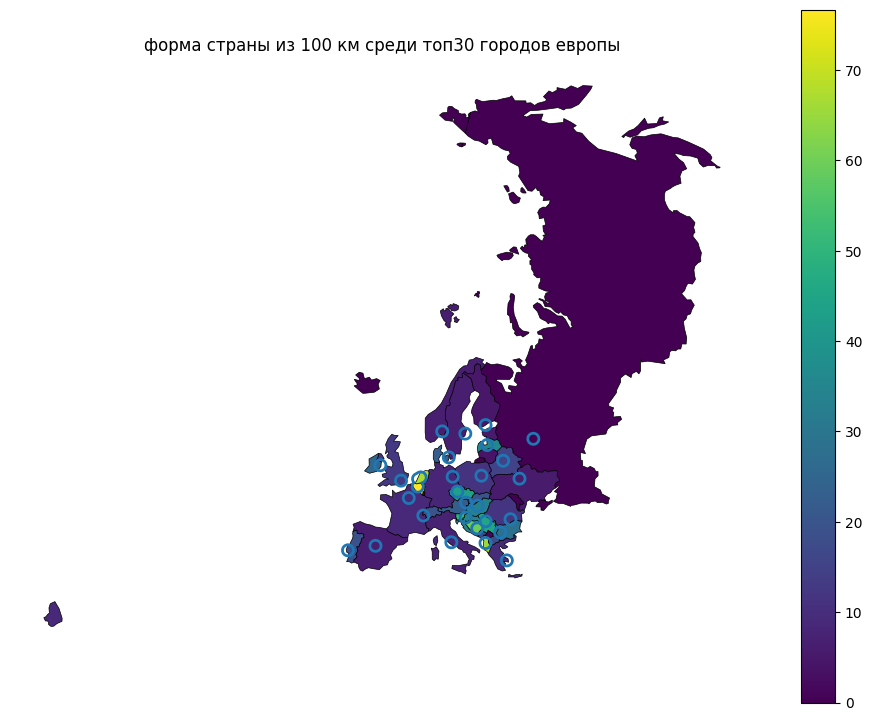

In [16]:
world  = gpd.read_file("ne_110m_admin_0_countries.shp")
cities = gpd.read_file("ne_110m_populated_places.shp")

#crs
if world.crs is None:
    world = world.set_crs("EPSG:4326")
if cities.crs is None:
    cities = cities.set_crs("EPSG:4326")

europe = world[world["CONTINENT"] == "Europe"][["NAME", "geometry"]].rename(columns={"NAME": "country"}).copy()
europe_eu = europe.to_crs("EPSG:3035")
cities_eu = cities.to_crs("EPSG:3035")

#Берём города Европы и выбираем топ N крупнейших
cities_in_europe = gpd.sjoin(cities_eu, europe_eu[["country", "geometry"]], how="inner", predicate="within")
city_name_col = "NAME" if "NAME" in cities_in_europe.columns else (
    "NAMEASCII" if "NAMEASCII" in cities_in_europe.columns else cities_in_europe.columns[0]
)
pop_col = "POP_MAX" if "POP_MAX" in cities_in_europe.columns else None

cities_small = cities_in_europe[[city_name_col, "geometry"]].rename(columns={city_name_col: "city"}).copy()
if pop_col is not None:
    cities_small["pop_max"] = pd.to_numeric(cities_in_europe[pop_col], errors="coerce")

top_n = 30
top_cities = (cities_small.sort_values("pop_max", ascending=False).head(top_n) if pop_col else cities_small.head(top_n))

#Строим буферы вокруг топ городов и объединяем их в одну геометрию
radius_km = 100
buffers_union = top_cities.buffer(radius_km * 1000).unary_union
buffers_gdf = gpd.GeoDataFrame({"geometry": [buffers_union]}, crs=europe_eu.crs)

#Считаем пересечение стран с общей буферной зоной и долю площади страны внутри зоны
inter = gpd.overlay(europe_eu[["country", "geometry"]], buffers_gdf, how="intersection")
inter["inter_area_km2"] = inter.geometry.area / 1_000_000

country_area = europe_eu.copy()
country_area["country_area_km2"] = country_area.geometry.area / 1_000_000

share = (
    inter.groupby("country", as_index=False)["inter_area_km2"].sum()
    .merge(country_area[["country", "country_area_km2"]], on="country", how="right")
)
share["inter_area_km2"] = share["inter_area_km2"].fillna(0)
share["share_pct"] = (share["inter_area_km2"] / share["country_area_km2"]) * 100

#Таблица
display(
    share[["country", "share_pct", "inter_area_km2", "country_area_km2"]]
    .sort_values("share_pct", ascending=False)
    .head(15)
)

#  и Карта
europe_plot = europe_eu.merge(share[["country", "share_pct"]], on="country", how="left")

fig, ax = plt.subplots(figsize=(12, 9))
europe_plot.plot(ax=ax, column="share_pct", legend=True, linewidth=0.5, edgecolor="black")
gpd.GeoSeries([buffers_union], crs=europe_eu.crs).boundary.plot(ax=ax, linewidth=2)

ax.set_title(f"форма страны из {radius_km} км среди топ{top_n} городов европы")
ax.set_axis_off()
plt.show()

### Пример 5. Упрощение геометрии и проверка качества

,country,area_km2,area_simpl_km2,area_diff_pct,valid_orig,valid_simpl
143,United Kingdom,249985.738095,249100.597850,-0.354076,True,True
141,Italy,315099.056938,315492.692596,0.124924,True,True
21,Norway,397947.842557,400066.689447,0.532443,True,True
123,Greece,131952.395802,135830.516465,2.939030,True,True


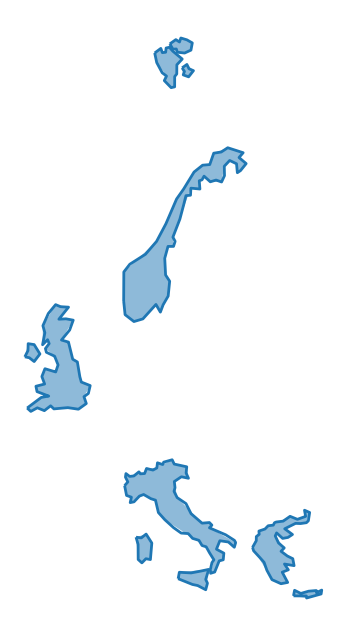

In [17]:
world = gpd.read_file("ne_110m_admin_0_countries.shp")
if world.crs is None:
    world = world.set_crs("EPSG:4326")

#Переходим в метры, чтобы допуск simplify был в метрах и сравнение площадей было корректным
world_eu = world.to_crs("EPSG:3035")

#Берём несколько стран с большим ко-вом вершинок
names = ["Norway", "Greece", "Italy", "United Kingdom"]
name_col = "NAME" if "NAME" in world_eu.columns else world_eu.columns[0]
sample = world_eu[world_eu[name_col].isin(names)][[name_col, "geometry"]].rename(columns={name_col: "country"}).copy()

#Упрощаем геометрию
tolerance_m = 20_000
sample["geom_simpl"] = sample.geometry.simplify(tolerance_m, preserve_topology=True)

#Сравниваем площади и валидность исходной , упрощённой геометрии
sample["area_km2"] = sample.geometry.area / 1_000_000
sample["area_simpl_km2"] = gpd.GeoSeries(sample["geom_simpl"], crs=sample.crs).area / 1_000_000
sample["area_diff_pct"] = (sample["area_simpl_km2"] / sample["area_km2"] - 1) * 100

sample["valid_orig"] = sample.geometry.is_valid
sample["valid_simpl"] = gpd.GeoSeries(sample["geom_simpl"], crs=sample.crs).is_valid

display(
    sample[["country", "area_km2", "area_simpl_km2", "area_diff_pct", "valid_orig", "valid_simpl"]]
    .sort_values("area_diff_pct")
)

#Карта: исходные (контур) vs упрощённые (заливка)
fig, ax = plt.subplots(figsize=(12, 8))

sample.boundary.plot(ax=ax, linewidth=2)
gpd.GeoSeries(sample["geom_simpl"], crs=sample.crs).plot(ax=ax, alpha=0.5)

ax.set_axis_off()
plt.show()

### Пример 6. Обрезка слоя городов по стране

,city,pop_max
212,Vienna,2400000
2,Vaduz,36281


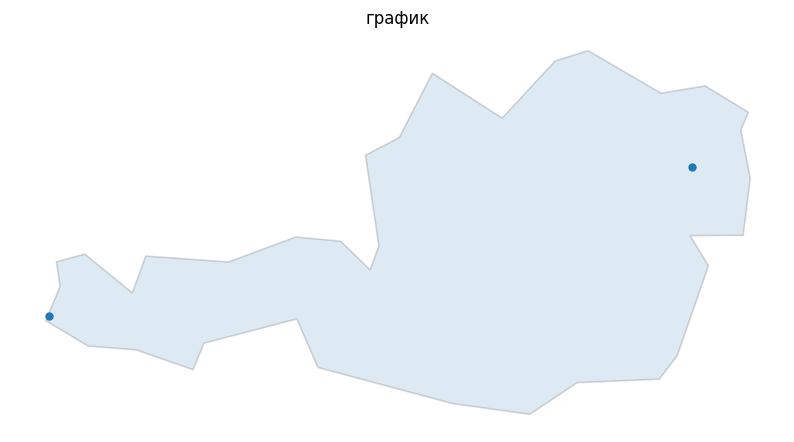

In [18]:
world  = gpd.read_file("ne_110m_admin_0_countries.shp")
cities = gpd.read_file("ne_110m_populated_places.shp")

if world.crs is None:
    world = world.set_crs("EPSG:4326")
if cities.crs is None:
    cities = cities.set_crs("EPSG:4326")

target = "Austria"
country = world[world["NAME"] == target][["NAME", "geometry"]].rename(columns={"NAME": "country"}).copy()
cities_clip = gpd.clip(cities, country)

name_col = "NAME" if "NAME" in cities_clip.columns else (cities_clip.columns[0])
pop_col = "POP_MAX" if "POP_MAX" in cities_clip.columns else None

out = cities_clip[[name_col, "geometry"]].rename(columns={name_col: "city"}).copy()
if pop_col:
    out["pop_max"] = pd.to_numeric(cities_clip[pop_col], errors="coerce")

display(
    (out[["city", "pop_max"]] if pop_col else out[["city"]])
    .sort_values("pop_max", ascending=False) if pop_col else out[["city"]]
    .head(15)
)

fig, ax = plt.subplots(figsize=(10, 8))
country.plot(ax=ax, linewidth=1.2, edgecolor="black", alpha=0.15)
out.plot(ax=ax, markersize=25)
ax.set_title(f"график")
ax.set_axis_off()
plt.show()

### Пример 7. Разбиение MultiPolygon на части

,country,part_id,part_km2
1,Russia,2,1.659504e+07
11,Russia,12,1.126111e+05
9,Russia,10,8.703049e+04
10,Russia,11,8.406823e+04
2,Russia,3,2.986681e+04
13,Russia,14,2.937455e+04
4,Russia,5,2.722208e+04
8,Russia,9,1.470998e+04
3,Russia,4,1.191115e+04
5,Russia,6,6.443527e+03


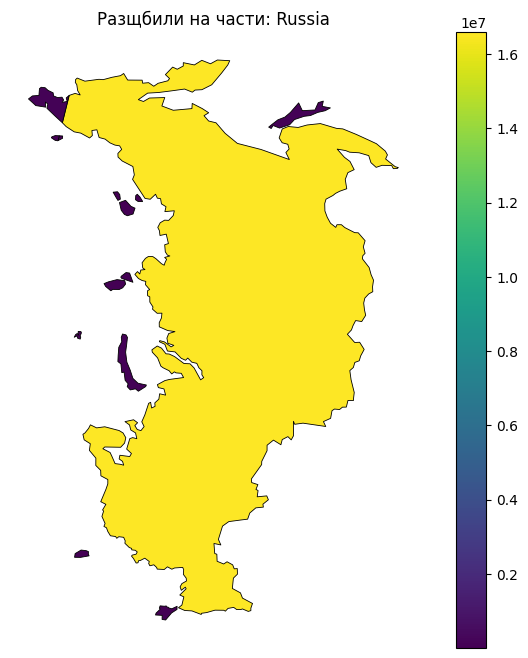

In [12]:
world = gpd.read_file("ne_110m_admin_0_countries.shp")
if world.crs is None:
    world = world.set_crs("EPSG:4326")

europe = world[world["CONTINENT"] == "Europe"][["NAME", "geometry"]].rename(columns={"NAME": "country"}).copy()
europe_eu = europe.to_crs("EPSG:3035")

multi = europe_eu[europe_eu.geom_type == "MultiPolygon"].copy()
if len(multi) == 0:
    multi = europe_eu.copy()

cand = multi.iloc[0:1].copy()
parts = cand.explode(index_parts=True).reset_index(drop=True)
parts["part_km2"] = parts.geometry.area / 1_000_000
parts["part_id"] = range(1, len(parts) + 1)

display(parts[["country", "part_id", "part_km2"]].sort_values("part_km2", ascending=False).head(15))

fig, ax = plt.subplots(figsize=(10, 8))
parts.plot(ax=ax, column="part_km2", legend=True, linewidth=0.6, edgecolor="black")
ax.set_title(f"Разщбили на части: {cand.iloc[0]['country']}")
ax.set_axis_off()
plt.show()

### Пример 8. Сетка (fishnet) и плотность городов

,cell_id,cities_count
1771,1771,2
1873,1873,2
1919,1919,2
1630,1630,2
1772,1772,1
1928,1928,1
1825,1825,1
1927,1927,1
2017,2017,1
1924,1924,1


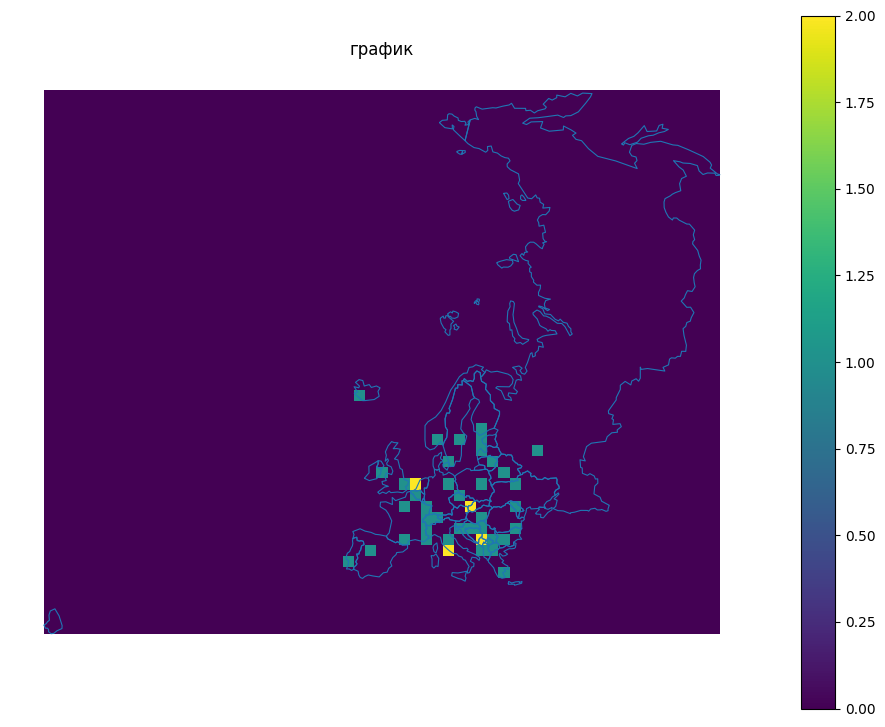

In [20]:
from shapely.geometry import box

world  = gpd.read_file("ne_110m_admin_0_countries.shp")
cities = gpd.read_file("ne_110m_populated_places.shp")

if world.crs is None:
    world = world.set_crs("EPSG:4326")
if cities.crs is None:
    cities = cities.set_crs("EPSG:4326")

europe = world[world["CONTINENT"] == "Europe"][["NAME", "geometry"]].rename(columns={"NAME": "country"}).copy()
europe_eu = europe.to_crs("EPSG:3035")
cities_eu = cities.to_crs("EPSG:3035")

cities_in_europe = gpd.sjoin(cities_eu, europe_eu[["geometry"]], how="inner", predicate="within").drop(columns=["index_right"])

minx, miny, maxx, maxy = europe_eu.total_bounds
cell = 200_000

polys = []
ids = []
k = 0
x = minx
while x < maxx:
    y = miny
    while y < maxy:
        polys.append(box(x, y, x + cell, y + cell))
        ids.append(k)
        k += 1
        y += cell
    x += cell

grid = gpd.GeoDataFrame({"cell_id": ids}, geometry=polys, crs=europe_eu.crs)

join = gpd.sjoin(cities_in_europe[["geometry"]], grid, how="inner", predicate="within")
counts = join.groupby("cell_id", as_index=False).size().rename(columns={"size": "cities_count"})
grid2 = grid.merge(counts, on="cell_id", how="left").fillna({"cities_count": 0})
grid2["cities_count"] = grid2["cities_count"].astype(int)

display(grid2[["cell_id", "cities_count"]].sort_values("cities_count", ascending=False).head(15))

fig, ax = plt.subplots(figsize=(12, 9))
grid2.plot(ax=ax, column="cities_count", legend=True, linewidth=0.1)
europe_eu.boundary.plot(ax=ax, linewidth=0.8)
ax.set_title("график")
ax.set_axis_off()
plt.show()

### Пример 9. Маршрут между городами и страны на пути

/usr/local/lib/python3.12/dist-packages/geopandas/tools/overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 9 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)


,country,len_km


/tmp/ipython-input-2726625653.py:35: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  europe_eu[europe_eu["country"].isin(report["country"])].plot(ax=ax, alpha=0.6)


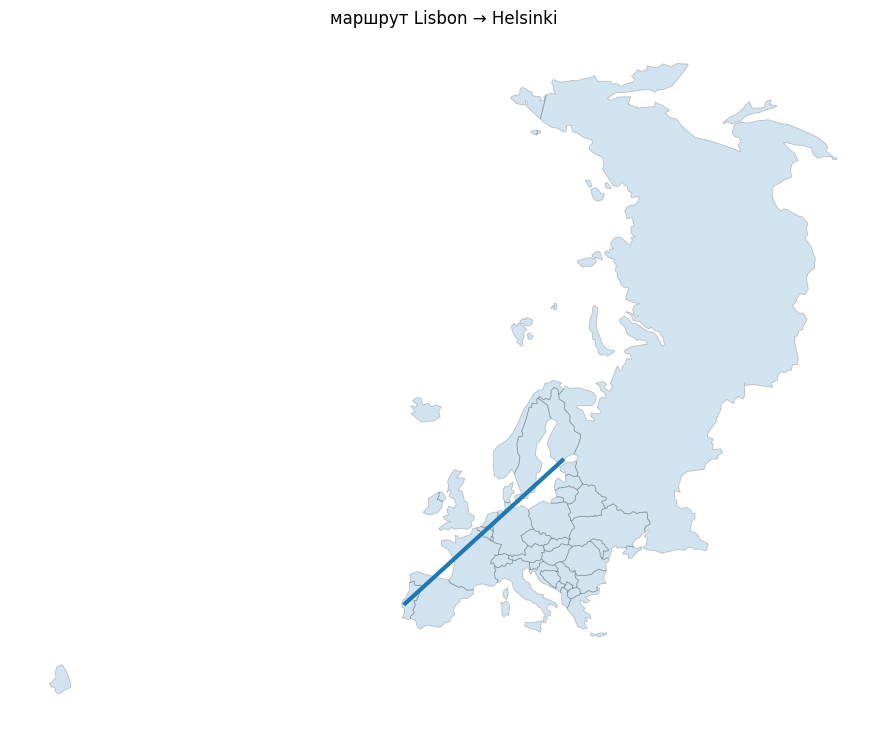

In [22]:
world  = gpd.read_file("ne_110m_admin_0_countries.shp")
cities = gpd.read_file("ne_110m_populated_places.shp")

if world.crs is None:
    world = world.set_crs("EPSG:4326")
if cities.crs is None:
    cities = cities.set_crs("EPSG:4326")

europe = world[world["CONTINENT"] == "Europe"][["NAME", "geometry"]].rename(columns={"NAME": "country"}).copy()

def pick_city(name):
    col = "NAME" if "NAME" in cities.columns else cities.columns[0]
    m = cities[cities[col].str.lower() == name.lower()]
    if len(m) == 0:
        m = cities[cities[col].str.lower().str.contains(name.lower(), na=False)]
    return m.iloc[0].geometry

a_name, b_name = "Lisbon", "Helsinki"
a = pick_city(a_name)
b = pick_city(b_name)

route = gpd.GeoDataFrame({"from": [a_name], "to": [b_name]}, geometry=[LineString([a, b])], crs="EPSG:4326")

europe_eu = europe.to_crs("EPSG:3035")
route_eu  = route.to_crs("EPSG:3035")

segments = gpd.overlay(europe_eu[["country", "geometry"]], route_eu[["geometry"]], how="intersection")
segments["len_km"] = segments.geometry.length / 1000

report = segments.groupby("country", as_index=False)["len_km"].sum().sort_values("len_km", ascending=False)
display(report.head(15))

fig, ax = plt.subplots(figsize=(12, 9))
europe_eu.plot(ax=ax, linewidth=0.6, edgecolor="black", alpha=0.2)
europe_eu[europe_eu["country"].isin(report["country"])].plot(ax=ax, alpha=0.6)
route_eu.plot(ax=ax, linewidth=3)
ax.set_title(f"маршрут {a_name} → {b_name}")
ax.set_axis_off()
plt.show()

### Пример 10. Зоны различий между исходной и упрощённой геометрией

,country,diff_km2
0,Italy,36390.709458


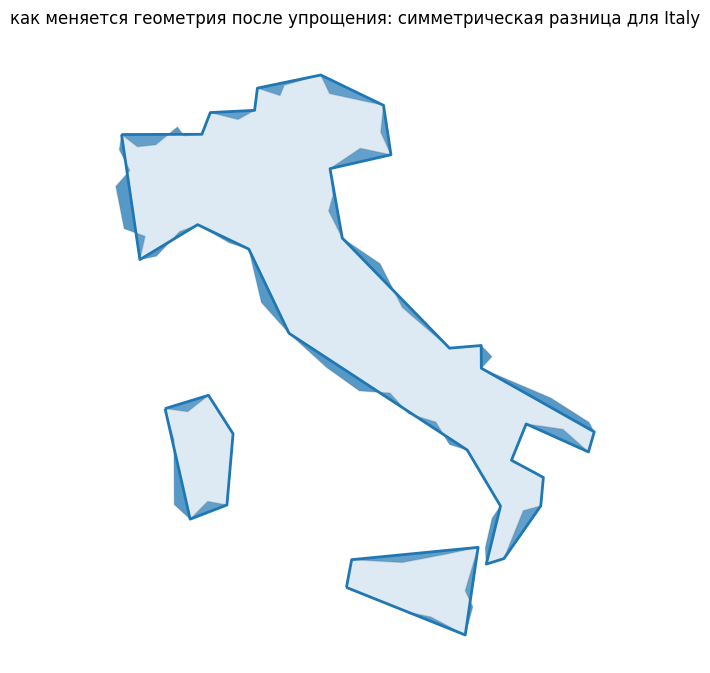

In [25]:
world = gpd.read_file("ne_110m_admin_0_countries.shp")
if world.crs is None:
    world = world.set_crs("EPSG:4326")

world_eu = world.to_crs("EPSG:3035")
name_col = "NAME" if "NAME" in world_eu.columns else world_eu.columns[0]

target = "Italy"
g0 = world_eu[world_eu[name_col] == target][[name_col, "geometry"]].rename(columns={name_col: "country"}).copy()

tol_m = 30_000
g1 = g0.copy()
g1["geometry"] = g1.geometry.simplify(tol_m, preserve_topology=True)

diff = gpd.overlay(g0, g1, how="symmetric_difference")
diff["diff_km2"] = diff.geometry.area / 1_000_000

display(
    diff[["diff_km2"]]
    .assign(country=target)
    .groupby("country", as_index=False)["diff_km2"].sum()
)

fig, ax = plt.subplots(figsize=(10, 8))
g0.plot(ax=ax, alpha=0.15, linewidth=1.0, edgecolor="black")
g1.boundary.plot(ax=ax, linewidth=2.0)
diff.plot(ax=ax, alpha=0.7)
ax.set_title(f"как меняется геометрия после упрощения: симметрическая разница для {target}")
ax.set_axis_off()
plt.show()

### Пример 11. Поворот и сдвиг геометрии

,object,minx,miny,maxx,maxy
0,original,4.281492e+06,2.602059e+06,4.839988e+06,2.894357e+06
1,transformed,4.529944e+06,2.672150e+06,5.009434e+06,3.082849e+06


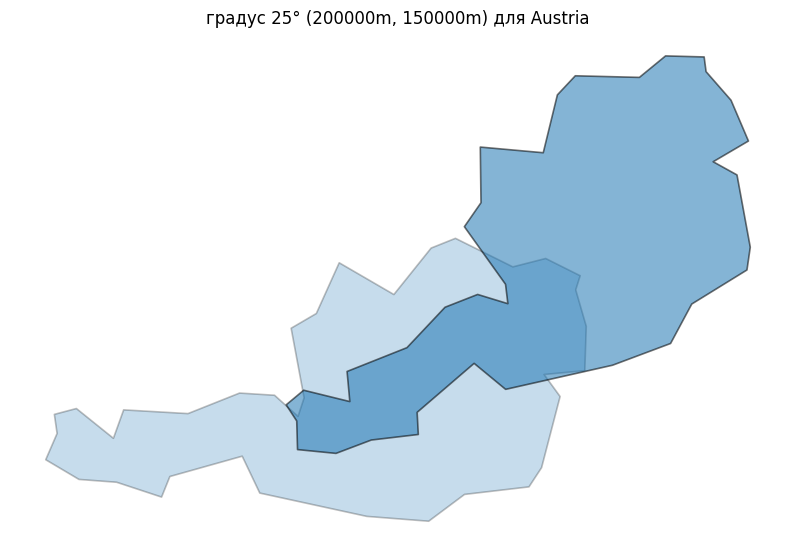

In [26]:
world = gpd.read_file("ne_110m_admin_0_countries.shp")
if world.crs is None:
    world = world.set_crs("EPSG:4326")

world_eu = world.to_crs("EPSG:3035")
name_col = "NAME" if "NAME" in world_eu.columns else world_eu.columns[0]

target = "Austria"
g = world_eu[world_eu[name_col] == target][[name_col, "geometry"]].rename(columns={name_col: "country"}).copy()

rot_deg = 25
dx, dy = 200_000, 150_000

g2 = g.copy()
g2["geometry"] = g2.geometry.rotate(rot_deg, origin="centroid").translate(dx, dy)

b0 = g.total_bounds
b1 = g2.total_bounds

display(
    gpd.GeoDataFrame(
        {
            "object": ["original", "transformed"],
            "minx": [b0[0], b1[0]],
            "miny": [b0[1], b1[1]],
            "maxx": [b0[2], b1[2]],
            "maxy": [b0[3], b1[3]],
        }
    )
)

fig, ax = plt.subplots(figsize=(10, 8))
g.plot(ax=ax, alpha=0.25, linewidth=1.2, edgecolor="black")
g2.plot(ax=ax, alpha=0.55, linewidth=1.2, edgecolor="black")
ax.set_title(f"градус {rot_deg}° ({dx}m, {dy}m) для {target}")
ax.set_axis_off()
plt.show()

### Пример 12. Конвертация crs и сравнение расстояний (градусы метры)

,from,to,distance_in_degrees,distance_km_projected
0,Vienna,Rome,7.404175,764.104338


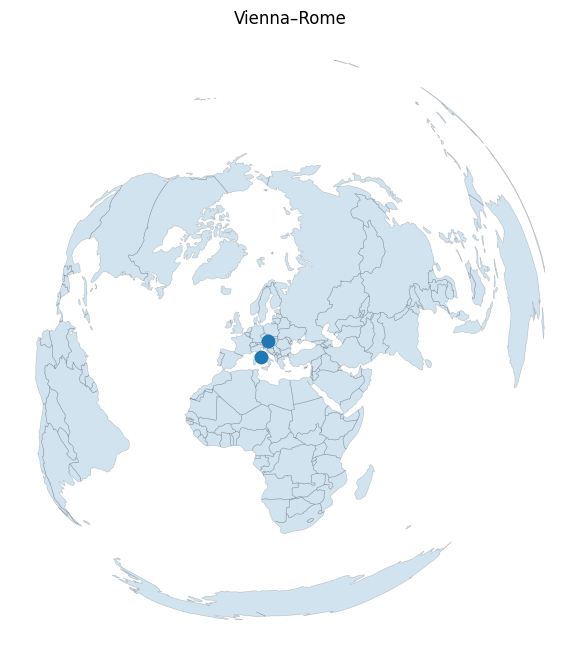

In [27]:
cities = gpd.read_file("ne_110m_populated_places.shp")
if cities.crs is None:
    cities = cities.set_crs("EPSG:4326")

name_col = "NAME" if "NAME" in cities.columns else ( "NAMEASCII" if "NAMEASCII" in cities.columns else cities.columns[0] )

def get_city_point(city):
    m = cities[cities[name_col].str.lower() == city.lower()]
    if len(m) == 0:
        m = cities[cities[name_col].str.lower().str.contains(city.lower(), na=False)]
    return m.iloc[0].geometry

a_name, b_name = "Vienna", "Rome"
a = get_city_point(a_name)
b = get_city_point(b_name)

g = gpd.GeoDataFrame({"city": [a_name, b_name]}, geometry=[a, b], crs="EPSG:4326")

dist_deg = g.geometry.iloc[0].distance(g.geometry.iloc[1])

g_eu = g.to_crs("EPSG:3035")
dist_km = g_eu.geometry.iloc[0].distance(g_eu.geometry.iloc[1]) / 1000

display(
    pd.DataFrame(
        {
            "from": [a_name],
            "to": [b_name],
            "distance_in_degrees": [dist_deg],
            "distance_km_projected": [dist_km],
        }
    )
)

fig, ax = plt.subplots(figsize=(10, 8))
world = gpd.read_file("ne_110m_admin_0_countries.shp")
if world.crs is None:
    world = world.set_crs("EPSG:4326")
world_eu = world.to_crs("EPSG:3035")

world_eu.plot(ax=ax, linewidth=0.4, edgecolor="black", alpha=0.2)
g_eu.plot(ax=ax, markersize=80)
ax.set_title(f"{a_name}–{b_name}")
ax.set_axis_off()
plt.show()